# Plotting Basics - IRIS-HEP Analysis Training 

Tutorial mainly based on the training given by Andrzej Novak on Data Visualization techniques and libraries

### Histograms mean different things in different contexts
- counts, bin edges - useful for a bar plot - `np.histogram` / `plt.bar`
- counts, bin edges, pre computed errors - `TGraphErrors`/`plt.errorbar`
- weighted values, weights squared, bin_edges - proper error calculation `TH1`/`Coffea.hist`/`hist`

## UHI - [Unified Histogram Interface](https://uhi.readthedocs.io/en/latest/plotting.html#using-the-protocol)
- (Plottable) Histogram protocol - designed to make libraries interoperable, easy to navigate
  - Conformed to by `hits`, `mplhep`, `uproot4`, `histoprint`
- Each UHI histogram has the following methods
  - `h.values()`: The value (as given by the kind)
  - `h.variances()`: The variance in the value (None if an unweighed histogram was filled with weights)
  - `h.counts()`: How many fills the bin received or the effective number of fills if the histogram is weighted
  - `h.axes`: A Sequence of axes
  - and a few other properties

## [hist](https://github.com/scikit-hep/hist)
- python go to one-stop for histogramming
- extends [boost-histogram](https://github.com/scikit-hep/boost-histogram.html) (pythonic wrapper for C++ library - *FAST*)
  - makes it user friendly
- shortcuts for convenience - plotting/fitting

## [mplhep](https://github.com/scikit-hep/mplhep)
- build on top of `matplotlib`
- extends functionality to easily plot histograms from various inputs
- holds style sheets for easy experiment specific style application

# Outline

 - Short matplotlib info
 - Histogramming in matplotlib
 - `mplhep` - basic example
 - `hist` - basic examples and indexing with UHI
 - Analysis style example
 
 
 

In [2]:
# Also get ROOT from conda-forge for this example
!mamba install -y -c conda-forge root


Looking for: ['root']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64 ━━━━━━━━━━╸━━━━━━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s
conda-forge/noarch   ━━━━━━━━━━━━━━━╸━━━━━━━   0.0 B /  ??.?MB @  ??.?MB/s  0.1s[+] 0.2s
conda-forge/linux-64 ╸━━━━━━━━━━━━━━━━━━━━━━   2.7MB /  36.2MB @  17.4MB/s  0.2s
conda-forge/noarch   ━━╸━━━━━━━━━━━━━━━━━━━━   2.2MB /  15.5MB @  14.4MB/s  0.2s[+] 0.3s
conda-forge/linux-64 ━━━━╸━━━━━━━━━━━━━━━━━━   8.1MB /  36.2MB @  31.2MB/s  0.3s
conda-forge/noarch   ━━━━━━━━━━╸━━━━━━━━━━━━   7.5MB /  15.5MB @  29.2MB/s  0.3s[+] 0.4s
conda-forge/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━  13.5MB /  36.2MB @  37.0MB/s  0.4s
conda-forge/noarch   ━━━━━━━━━━━━━━━━━━╸━━━━  12.9MB /  15.5MB @  35.8MB/s  0.4sconda-forge/noarch                                  15.5MB @  37.5MB/s  0.5s
[+] 0.5s
conda-forge/linux-64 ━━━━━━━━━╸━━━━━━━━━━━━━  17.0MB /  36.2MB @  36.6MB/s  0.5s[+] 0.6s
conda-forge/linux-64 ━━━━━━━━━━━━━━━╸━━━━━━━  26.2MB /  36.2MB @  46.2MB/s  0.6s[+] 0.7s
conda-forge/linux-64 ━━

# Two ways of matplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Stateful

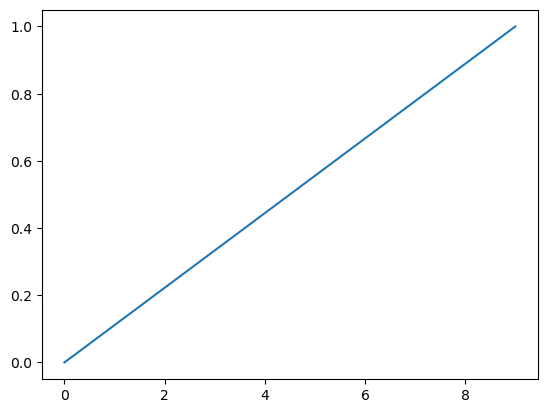

In [4]:
plt.plot(np.arange(0, 10, 1), np.linspace(0, 1, 10))
# plt.title("Test")
# plt.legend()

### Object-oriented

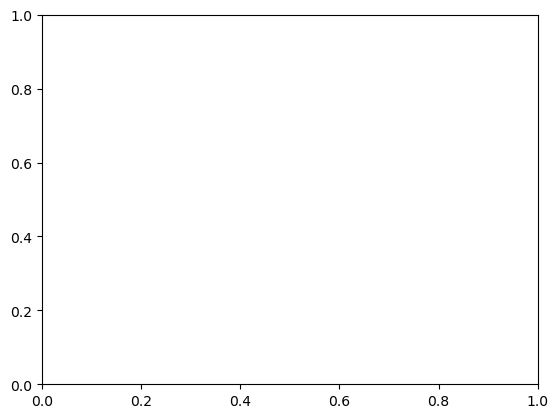

In [5]:
fig, ax = plt.subplots()

In [6]:
ax.plot(np.linspace(0, 1, 10), np.linspace(0, 10, 10))

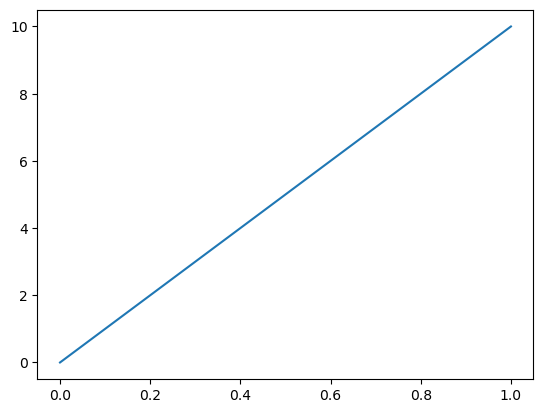

In [7]:
fig

## Switching back and forth

Text(0.5, 1.0, 'TEST')

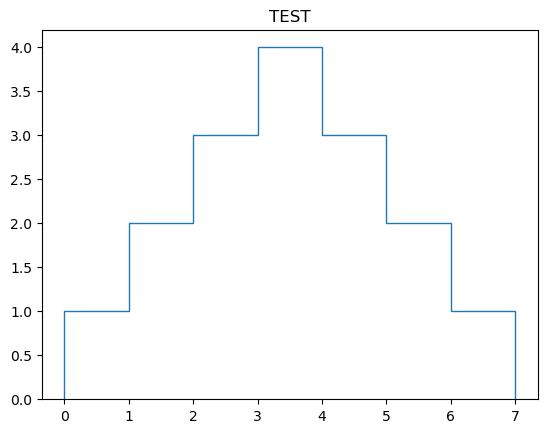

In [8]:
fig, ax = plt.subplots()
ax.stairs([1,2,3,4,3,2,1])
plt.title("TEST")

Text(0.5, 1.0, 'TEST')

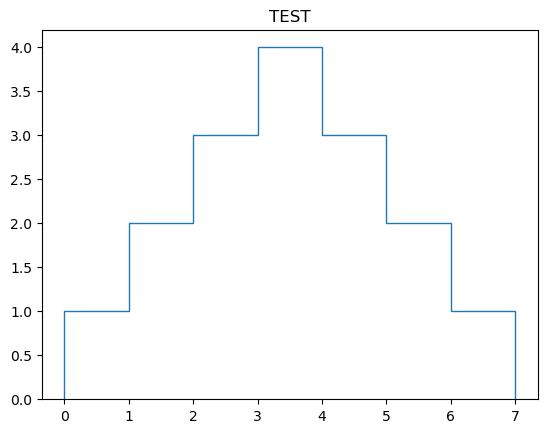

In [9]:
plt.stairs([1,2,3,4,3,2,1])
ax = plt.gca()
ax.set_title("TEST")

# Histogramming in matplotlib

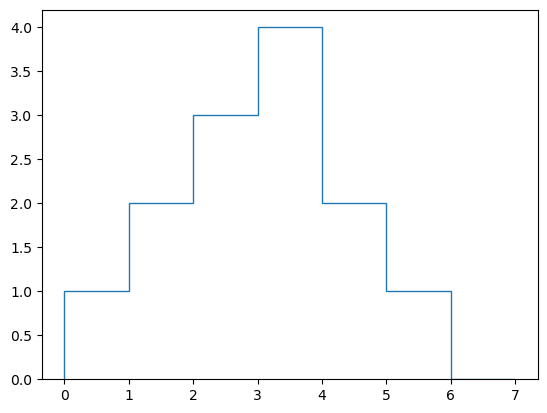

In [10]:
fig, ax = plt.subplots()
ax.stairs([1,2,3,4,2,1,0])

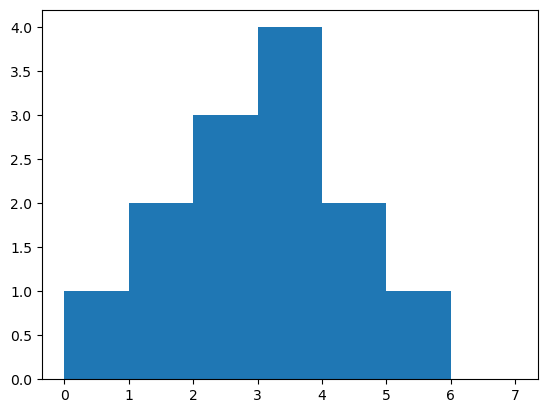

In [11]:
fig, ax = plt.subplots()
ax.stairs([1,2,3,4,2,1,0], baseline=0, fill=True)

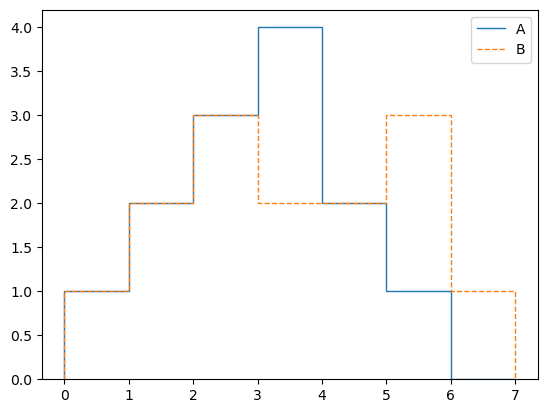

In [12]:
a, b = [1,2,3,4,2,1,0], [1,2,3,2,2,3,1]

fig, ax = plt.subplots()
ax.stairs(a, label="A")
ax.stairs(b, label='B', ls='--')
plt.legend()

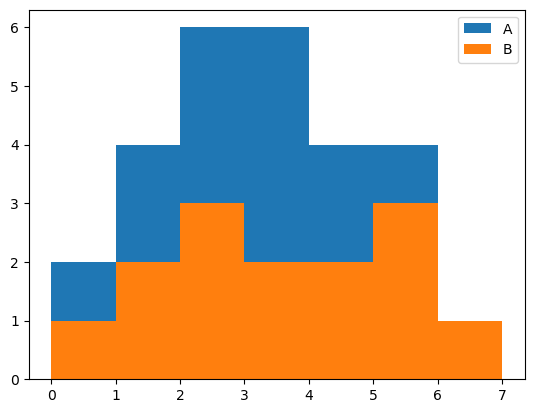

In [13]:
fig, ax = plt.subplots()
ax.stairs(np.sum([a,b], axis=0), baseline=b, fill=True, label="A")
ax.stairs(b, fill=True, label='B')
plt.legend()

## Other histogramming methods

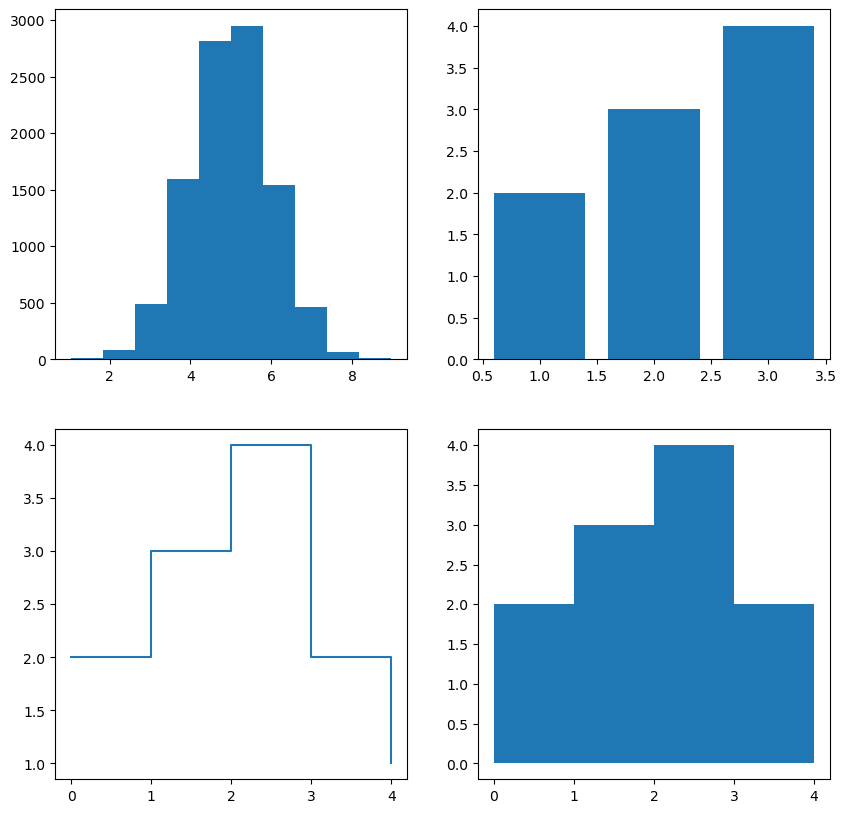

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.flatten()

# in-situ np.histogram()
axs[0].hist(np.random.normal(5, 1, 10000));

# bar plots
axs[1].bar([1,2,3], [2,3,4])  # (x-position), bin-value);

# step - skyline
axs[2].step(np.arange(0, 5, 1), [2,3,4,2,1], where='post');

# filled
axs[3].fill_between(np.arange(0, 5, 1), [2,3,4,2, 1], step='post');

# Better histogramming - mplhep

In [15]:
import mplhep as hep

In [16]:
yields, bins = np.histogram(np.random.normal(5, 1, 5000), bins=10)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7edb5cd3f0>, errorbar=None, legend_artist=None)]

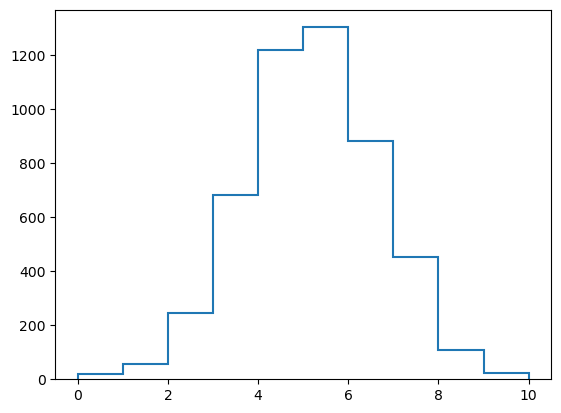

In [17]:
hep.histplot(yields)

### Primary goal is to stay unobtrusive, if it works in `matplotlib`, it should work in `mplhep`

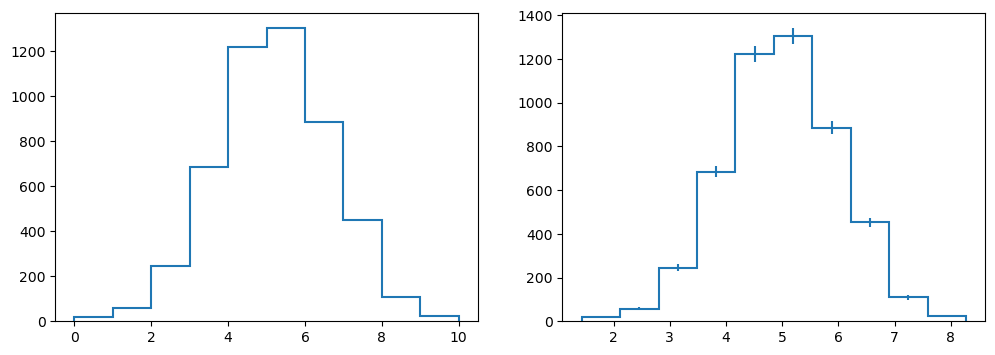

In [18]:
import mplhep as hep
f, axs = plt.subplots(1,2, figsize=(12, 4))

hep.histplot(yields, ax=axs[0])
hep.histplot(yields, bins, yerr=True, ax=axs[1]);

### Kwargs are passed though to `matplotlib`

[ErrorBarArtists(errorbar=<ErrorbarContainer object of 3 artists>)]

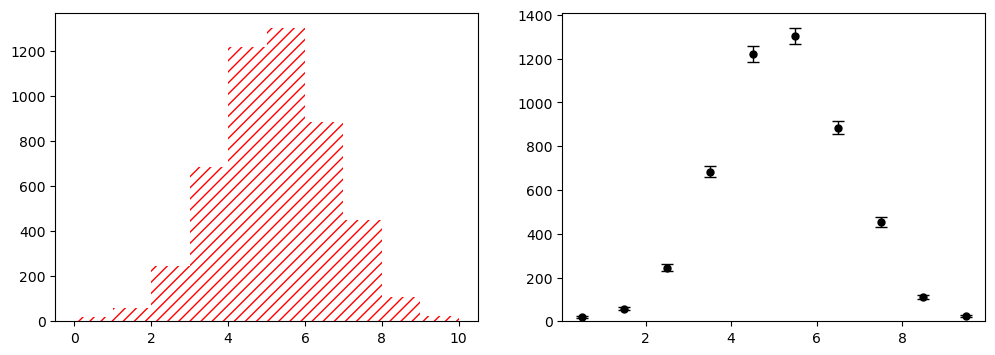

In [19]:
f, axs = plt.subplots(1,2, figsize=(12, 4))

hep.histplot(yields, ax=axs[0], histtype='fill', hatch='///', edgecolor='red', facecolor='none')
hep.histplot(yields, ax=axs[1], histtype='errorbar', yerr=True, c='black', capsize=4)

### Stacking, norming is available

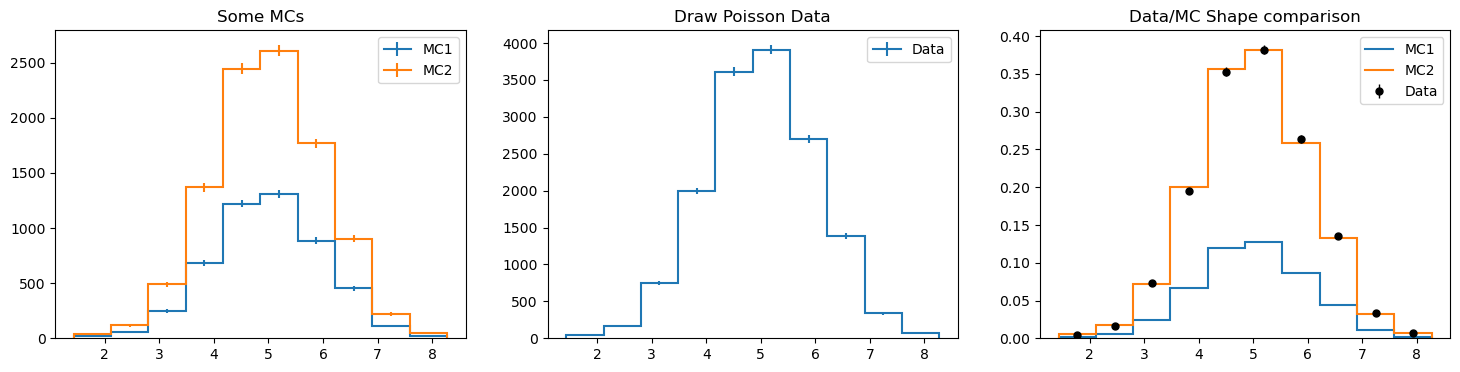

In [20]:
h = yields
f, axs = plt.subplots(1,3, figsize=(18, 4))

data = np.random.poisson(h*3)
hep.histplot([h, h*2], bins=bins, ax=axs[0], yerr=True, label=["MC1", "MC2"])
hep.histplot(data, bins=bins, ax=axs[1], yerr=True, label="Data")

hep.histplot([h, h*2], bins=bins, ax=axs[2], stack=True, label=["MC1", "MC2"], density=True)
hep.histplot(data, bins=bins, ax=axs[2], yerr=True, histtype='errorbar', label="Data", density=True, color='k')
for ax in axs:
    ax.legend()
axs[0].set_title("Some MCs")
axs[1].set_title("Draw Poisson Data")
axs[2].set_title("Data/MC Shape comparison"); 

### Convenient sorting options

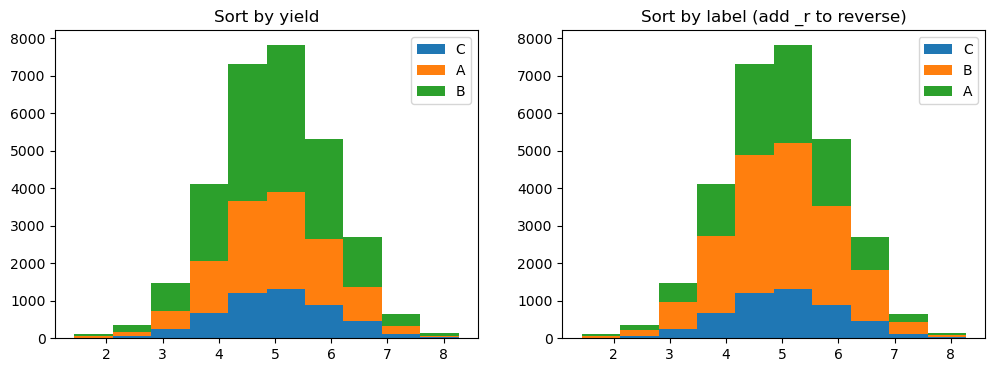

In [21]:
f, axs = plt.subplots(1,2, figsize=(12, 4))
hep.histplot([h*2, h*3, h], bins=bins, ax=axs[0], stack=True, histtype='fill', label=["A", "B", "C"], sort='yield');
hep.histplot([h*2, h*3, h], bins=bins, ax=axs[1], stack=True, histtype='fill', label=["A", "B", "C"], sort='label_r');
for ax in axs:
    ax.legend()
axs[0].set_title("Sort by yield")
axs[1].set_title("Sort by label (add _r to reverse)");

['hpx;1', 'hpxpy;1', 'hprof;1', 'ntuple;1']
<TH1F (version 1) at 0x7f7ed7fc0130>


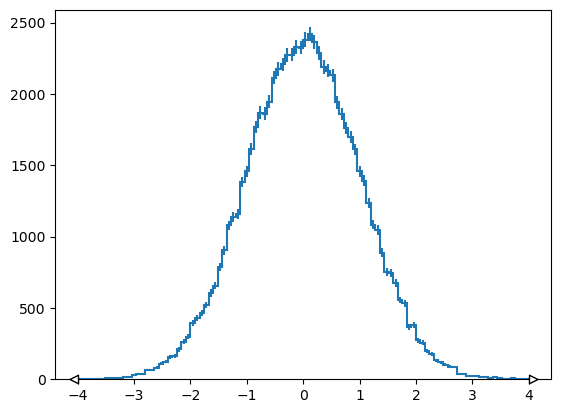

In [22]:
## Uproot TH1 
import uproot
from skhep_testdata import data_path
fname = data_path("uproot-hepdata-example.root")
f = uproot.open(fname)
print(f.keys())
print(f['hpx'])
hep.histplot(f['hpx']);

C system headers (glibc/Xcode/Windows SDK) must be installed.
In file included from input_line_4:36:
/usr/local/bin/../lib/gcc/x86_64-conda-linux-gnu/12.4.0/include/c++/cassert:44:10: fatal error: 'assert.h' file not found
#include <assert.h>
         ^~~~~~~~~~
input_line_35:1:10: fatal error: 'dlfcn.h' file not found
#include "dlfcn.h"
         ^~~~~~~~~


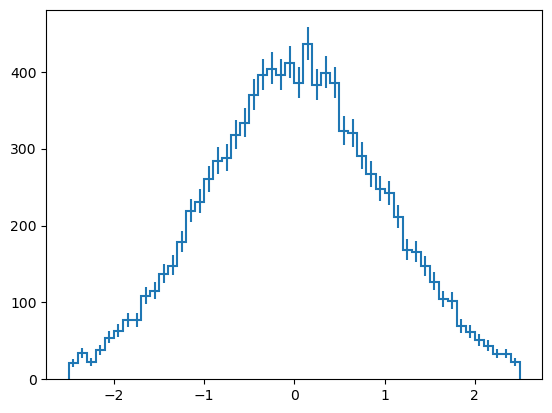

In [23]:
# PyROOT TH1
import ROOT
h = ROOT.TH1F("h1", "h1", 50, -2.5, 2.5)
h.FillRandom("gaus", 10000)

hep.histplot(h);

# Better histogramming with hist

In [24]:
import hist

/usr/local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [25]:
# histogram creation
h = hist.Hist(
    hist.axis.Regular(10, 0, 10, name="x", label="x-axis"),
#     hist.axis.Variable([0, 1, 2, 5, 10], name="y", label="y-axis"),
    hist.storage.Int64()
)
h

Hist(Regular(10, 0, 10, name='x', label='x-axis'), storage=Int64())

In [26]:
# basic filling
h.fill([1, 4, 6], 
#       [3, 5, 2]
      )
h

Hist(Regular(10, 0, 10, name='x', label='x-axis'), storage=Int64()) # Sum: 3.0

In [27]:
# Filling by names is possible for better bookkeeping:
h.fill(x=[1, 5, 5, 7], 
#        y=[3, 5, 2]
      )
h

Hist(Regular(10, 0, 10, name='x', label='x-axis'), storage=Int64()) # Sum: 7.0

In [28]:
# information access
h.values()

array([0, 2, 0, 0, 1, 2, 1, 1, 0, 0], dtype=int64)

In [29]:
h.axes[0]

Regular(10, 0, 10, name='x', label='x-axis')

In [30]:
h.axes[0].edges

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [31]:
# Print it (to CLI)
h.show(columns=50)

  0.000 _ x 10^+01                         2/row ╷
  0.100 _
  0.200 _█████████████████████████████████████████
  0.300 _
  0.400 _
  0.500 _████████████████████
  0.600 _█████████████████████████████████████████
  0.700 _████████████████████
  0.800 _████████████████████
  0.900 _
  1.000 _


## Quick hist creation

In [32]:
# histogram creation
h = hist.new.Regular(10, 0, 10, name="x", label="x-axis") \
    .Variable(range(10), name="y", label="y-axis") \
    .Int64().fill(*np.random.multivariate_normal([4, 6], [[2, 0], [0, 1]], 10000).T)
    
h

Hist(
  Regular(10, 0, 10, name='x', label='x-axis'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='y', label='y-axis'),
  storage=Int64()) # Sum: 9959.0 (10000.0 with flow)

In [33]:
# even quicker
h = hist.new.Reg(10, 0, 10).Var(range(10)).Int64() \
#     .fill(*np.random.multivariate_normal([4, 6], [[2, 0], [0, 1]], 10000).T)
h

Hist(
  Regular(10, 0, 10, label='Axis 0'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], label='Axis 1'),
  storage=Int64())

## Axis types 

In [34]:
axis0 = hist.axis.Regular(10, -5, 5, overflow=False, underflow=False, name="A")
# axis1 = hist.axis.Boolean(name="B")
axis2 = hist.axis.Variable(range(10), name="C")
# axis3 = hist.axis.Integer(-5, 5, overflow=False, underflow=False, name="D")
axis4 = hist.axis.IntCategory(range(10), name="E")
axis5 = hist.axis.StrCategory(["T", "F"], name="F")

In [35]:
# Growth!
h = hist.new.Reg(10, 0, 10).StrCat([], growth=True).Weight()
h.fill(np.random.normal(5, 2, 1000), "A")
h.fill(np.random.normal(7, 2, 1000), "B")

Hist(
  Regular(10, 0, 10, label='Axis 0'),
  StrCategory(['A', 'B'], growth=True, label='Axis 1'),
  storage=Weight()) # Sum: WeightedSum(value=1903, variance=1903) (WeightedSum(value=2000, variance=2000) with flow)

## Storage types

A number of possible storage type exist: `Double`, `Unlimited`, `Int64`, `AutomicInt64`, `Weight`, `Mean`, and `WeightedMean`.

In practice you will always use `Weight()`

In [36]:
hist.new.Reg(10, 0, 10).Weight().fill([1,2,3,5], weight=[1,1,1,0.5])

Hist(Regular(10, 0, 10, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=3.5, variance=3.25)

In [37]:
hist.new.Reg(10, 0, 10).Weight().fill([1,2,3,5])

Hist(Regular(10, 0, 10, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=4, variance=4)

## Hist manipulation and UHI

https://hist.readthedocs.io/en/latest/user-guide

Yes, we've had one documentation, but what about another one...

https://uhi.readthedocs.io/en/latest/

In [38]:
# example histogram
h = hist.new.Reg(10, 0, 10, name="x") \
    .Var(range(10), name="y") \
    .Var(range(10), name="z") \
    .Weight().fill(*np.random.multivariate_normal([4, 6, 4], np.eye(3), 100000).T)
    
h

Hist(
  Regular(10, 0, 10, name='x'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='y'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='z'),
  storage=Weight()) # Sum: WeightedSum(value=99845, variance=99845) (WeightedSum(value=100000, variance=100000) with flow)

In [39]:
# Project on an axis
h.project("x")

Hist(Regular(10, 0, 10, name='x'), storage=Weight()) # Sum: WeightedSum(value=99998, variance=99998) (WeightedSum(value=100000, variance=100000) with flow)

In [40]:
# Slicing (applying cuts)
h[5:, :, sum]

Hist(
  Regular(5, 5, 10, name='x'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='y'),
  storage=Weight()) # Sum: WeightedSum(value=15603, variance=15603) (WeightedSum(value=100000, variance=100000) with flow)

In [41]:
# Indexing by bin vs value
h[5:, 5j:, sum]

Hist(
  Regular(5, 5, 10, name='x'),
  Variable([5, 6, 7, 8, 9], name='y'),
  storage=Weight()) # Sum: WeightedSum(value=13152, variance=13152) (WeightedSum(value=100000, variance=100000) with flow)

In [42]:
# Dictionary access
h[{"y": 5, "z": sum}]

Hist(Regular(10, 0, 10, name='x'), storage=Weight()) # Sum: WeightedSum(value=34190, variance=34190) (WeightedSum(value=34191, variance=34191) with flow)

In [43]:
# More robust slicing and  
s = hist.tag.Slicer()
s

In [44]:
h[{"z": sum, "y": s[:hist.loc(5):hist.sum]}]

Hist(Regular(10, 0, 10, name='x'), storage=Weight()) # Sum: WeightedSum(value=15829, variance=15829) (WeightedSum(value=15830, variance=15830) with flow)

## Mind the flow bins!

In [45]:
h[sum, sum, :].values()

array([1.3100e+02, 2.2180e+03, 1.3463e+04, 3.4312e+04, 3.3975e+04,
       1.3657e+04, 2.1160e+03, 1.2500e+02, 2.0000e+00])

In [46]:
h[sum, sum, :].values(flow=True)

array([1.0000e+00, 1.3100e+02, 2.2180e+03, 1.3463e+04, 3.4312e+04,
       3.3975e+04, 1.3657e+04, 2.1160e+03, 1.2500e+02, 2.0000e+00,
       0.0000e+00])

In [47]:
h[sum, 0:len:sum, :].values(flow=True)

array([1.0000e+00, 1.3000e+02, 2.2110e+03, 1.3434e+04, 3.4269e+04,
       3.3917e+04, 1.3645e+04, 2.1140e+03, 1.2500e+02, 2.0000e+00,
       0.0000e+00])

In [48]:
h[sum, sum, :].values(flow=True) - h[sum, 0:len:sum, :].values(flow=True)

array([ 0.,  1.,  7., 29., 43., 58., 12.,  2.,  0.,  0.,  0.])

In [49]:
# Doesn't work in dict-access
# h[{0: 0:len:sum}] 

In [50]:
# Meanwhile slicer allows this syntax in dict-access
h[{0: s[0:len:sum]}]

Hist(
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='y'),
  Variable([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], name='z'),
  storage=Weight()) # Sum: WeightedSum(value=99845, variance=99845) (WeightedSum(value=99998, variance=99998) with flow)

In [51]:
# If you know you won't need them, you can skip flow bins
hist.new.Reg(10, 0, 10, flow=False).Weight()

Hist(Regular(10, 0, 10, underflow=False, overflow=False, label='Axis 0'), storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

 ## Hist plots with mplhep

In [52]:
h = hist.new.Reg(10, 0, 10).Weight().fill(np.random.normal(5, 1, 1000))

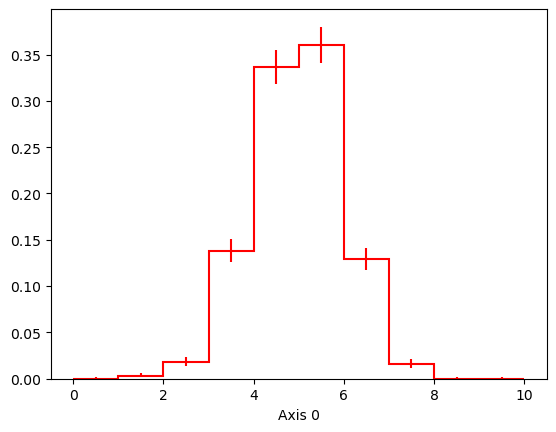

In [53]:
# Plot it
h.plot(color='red', density=True);

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ea319aa40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

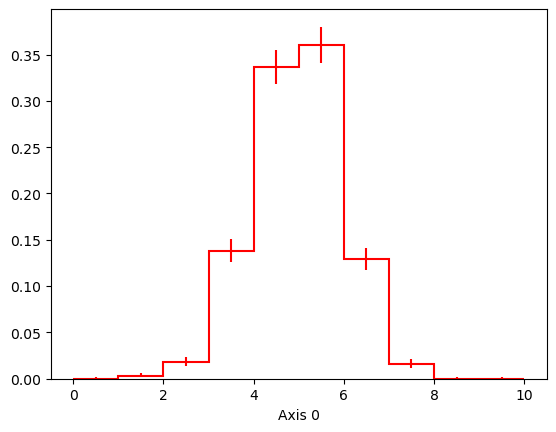

In [54]:
#equivalent to  
hep.histplot(h, color='red', density=True)

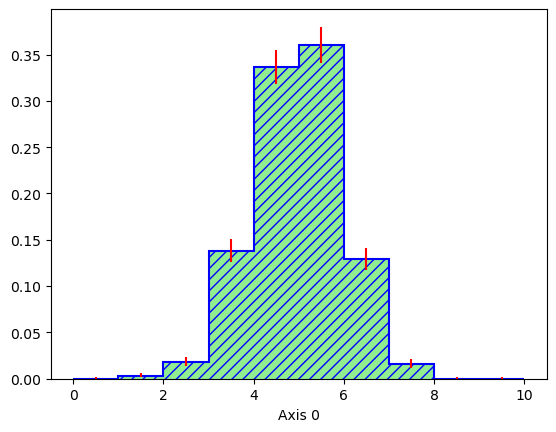

In [55]:
# Access and modify artists
art = h.plot(color='red', density=True);
plt.setp(art[0].stairs, edgecolor='blue', fill=True, facecolor='lightgreen', hatch='///');

## N-D Histograms are cool

In [56]:
# Create a new hist
h2d = hist.new.Reg(10, 0, 10, name='x').StrCat(["A", "B"], growth=True, name='dataset').Weight()
h2d

Hist(
  Regular(10, 0, 10, name='x'),
  StrCategory(['A', 'B'], growth=True, name='dataset'),
  storage=Weight()) # Sum: WeightedSum(value=0, variance=0)

In [57]:
# Fill it
h2d.fill(np.random.normal(3, 1, 1000), "A")
h2d.fill(np.random.normal(5, 1, 3000), "B")
h2d.fill(np.random.normal(7, 1, 2000), "C")
h2d

Hist(
  Regular(10, 0, 10, name='x'),
  StrCategory(['A', 'B', 'C'], growth=True, name='dataset'),
  storage=Weight()) # Sum: WeightedSum(value=5994, variance=5994) (WeightedSum(value=6000, variance=6000) with flow)

/usr/local/lib/python3.10/site-packages/hist/basehist.py:406: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


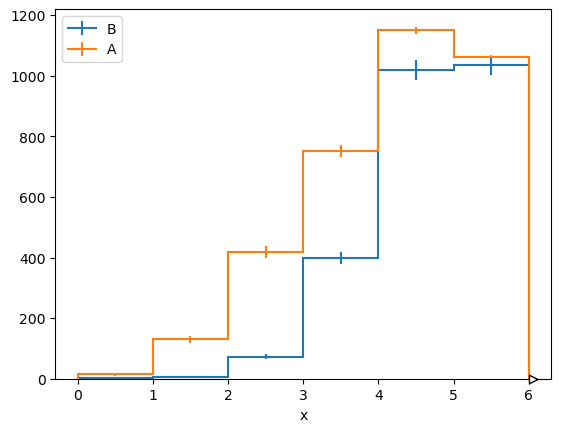

In [58]:
h2d[:6, ["A", "B"]].plot(stack=True, histtype='step', sort='y_r');
plt.legend()

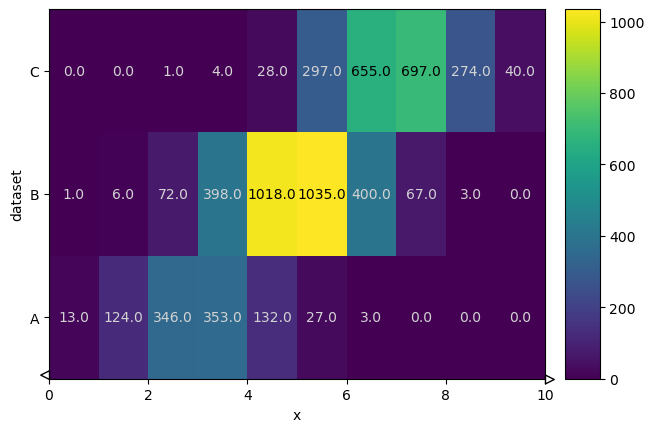

In [59]:
hep.hist2dplot(h2d, labels=True);

# Analysis-like example

In [60]:
hn = (hist.new.Reg(100, 0, 100, name='x', label='Observable')
      .Var([0, 0.2, 0.5, 0.9, 1], name="tag", label="Some MVA")
      .StrCat(["A"], growth=True, name='dataset')
      .IntCat([0, 1, 2, 3], name='region')
      .StrCat(["A"], growth=True, name='syst', label='Systematic')
      .Weight()
     )

In [61]:
# Small random letter helper
def rnd_letters(a="A", z="Z", N=10):
    A, Z = np.array([a, z]).view("int32") 
    return list(np.random.randint(low=A,high=Z,size=N,dtype="int32").view(f"U{N}")[0])
rnd_letters("C", "F")

['D', 'C', 'D', 'C', 'D', 'C', 'E', 'E', 'E', 'E']

In [62]:
# And fill it
N = 400000
for sample in set(rnd_letters("A", "G", 500)):
    hn.fill(x = np.random.normal(np.random.randint(20, 80, 1), 10, N),
            tag = np.random.uniform(0, 1, N),
            dataset = sample,
            region=np.random.randint(0, 4, N),
            syst = rnd_letters("P", "Z", N=N)
            )
hn

Hist(
  Regular(100, 0, 100, name='x', label='Observable'),
  Variable([0, 0.2, 0.5, 0.9, 1], name='tag', label='Some MVA'),
  StrCategory(['A', 'E', 'F', 'C', 'B', 'D'], growth=True, name='dataset'),
  IntCategory([0, 1, 2, 3], name='region'),
  StrCategory(['A', 'Q', 'Y', 'S', 'V', 'U', 'X', 'T', 'R', 'W', 'P'], growth=True, name='syst', label='Systematic'),
  storage=Weight()) # Sum: WeightedSum(value=2.38941e+06, variance=2.38941e+06) (WeightedSum(value=2.4e+06, variance=2.4e+06) with flow)

In [63]:
# Simple slices
hn[:, 0.5j:len:sum, :, 0, "X"]

Hist(
  Regular(100, 0, 100, name='x', label='Observable'),
  StrCategory(['A', 'E', 'F', 'C', 'B', 'D'], growth=True, name='dataset'),
  storage=Weight()) # Sum: WeightedSum(value=29686, variance=29686) (WeightedSum(value=29839, variance=29839) with flow)

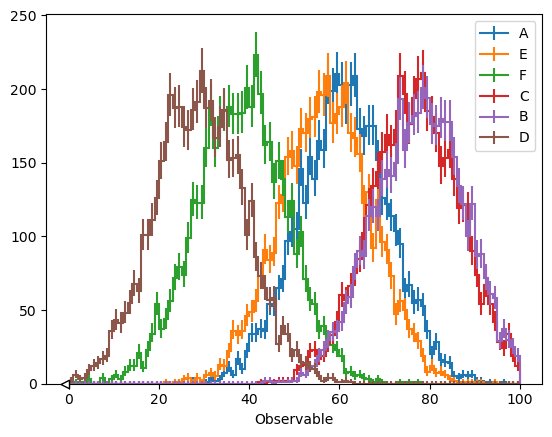

In [64]:
# Slice by name
s = hist.tag.Slicer()
hn[{'tag': s[0.5j:len:sum], 'region': 0, 'syst': "X"}].plot();
plt.legend();

### Scale "sample" by "cross-section"

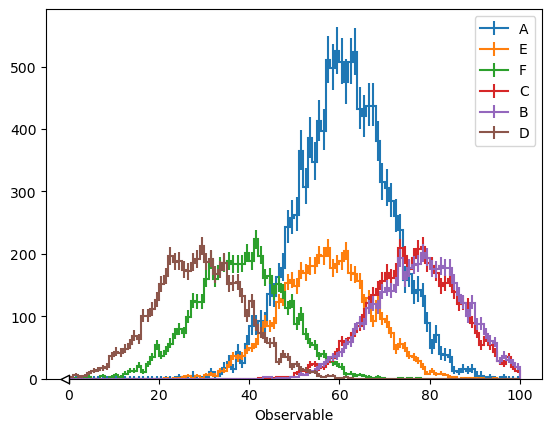

In [65]:
hn[{'dataset': "A"}] = hn[{'dataset': "A"}].view() * 2.5

hn[{'tag': s[0.5j:len:sum], 'region': 0, 'syst': "X"}].plot();
plt.legend();

### Group datasets (to be replaced by native hist function)

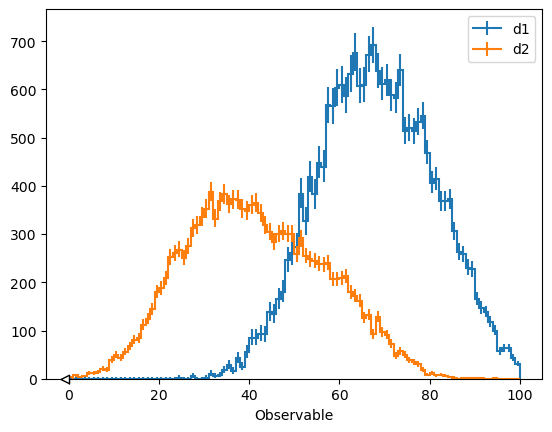

In [66]:
def groupby(h, groupmap, axis='dataset'):
    new = hist.Hist(*[ax for ax in h.axes if ax.name != axis], 
                hist.axis.StrCategory(groupmap.keys(), name=axis, growth=True), 
                hist.storage.Weight()
          )

    for name, cats in groupmap.items():
        grouped = sum([h[{axis: name}] for name in cats])
        new[{axis: name}] = grouped.view(flow=True)
    return new

groupby(hn, {"d1": ["A", "B", "C"], 'd2': ["D", "E", 'F']})[{'tag': s[0.5j:len:sum], 'region': 0, 'syst': "X"}].plot();
plt.legend();

### Desired end goal - 1D templates of each sample, passing a cut, per region per systematic

In [67]:
cut = {'tag': s[0.5j:len:sum]} # Events passing 0.5 threshold

templates = {}
for sample in hn.axes['dataset']:
    for region in hn.axes['region']:
        for syst in hn.axes['syst']:
            template_name = f"region{region}_{sample}_sys{syst}"
            templates[template_name] = hn[{**cut, 'dataset': sample, 'region': region, 'syst': syst}]

In [68]:
templates['region0_B_sysX']

Hist(Regular(100, 0, 100, name='x', label='Observable'), storage=Weight()) # Sum: WeightedSum(value=4840, variance=4840) (WeightedSum(value=4929, variance=4929) with flow)

### Save it via uproot

In [69]:
import uproot 
fout = uproot.recreate("some_file.root")
fout["my_hist"] = templates['region0_B_sysX']
fout.close()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ea7d6c730>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

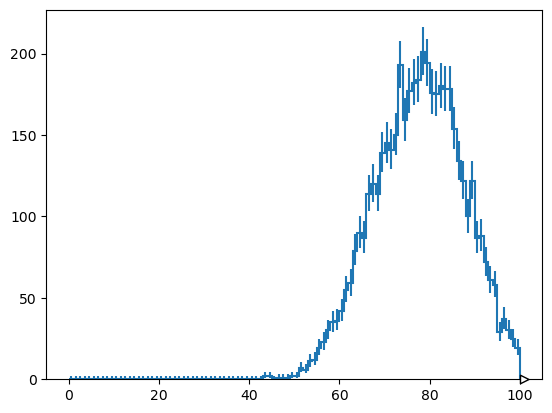

In [70]:
fin = uproot.open("some_file.root")
hep.histplot(fin['my_hist'])

# Styling with mplhep
- Primary purpose of `mplhep` is to serve and distribute styles 
    - **ALICE**
    - **ATLAS**
    - **CMS**
    - **LHCb**
- To ensure plots looks the same on any framework fonts need to be included
 - We package an open look-alike of Helvetica called Tex Gyre Heros

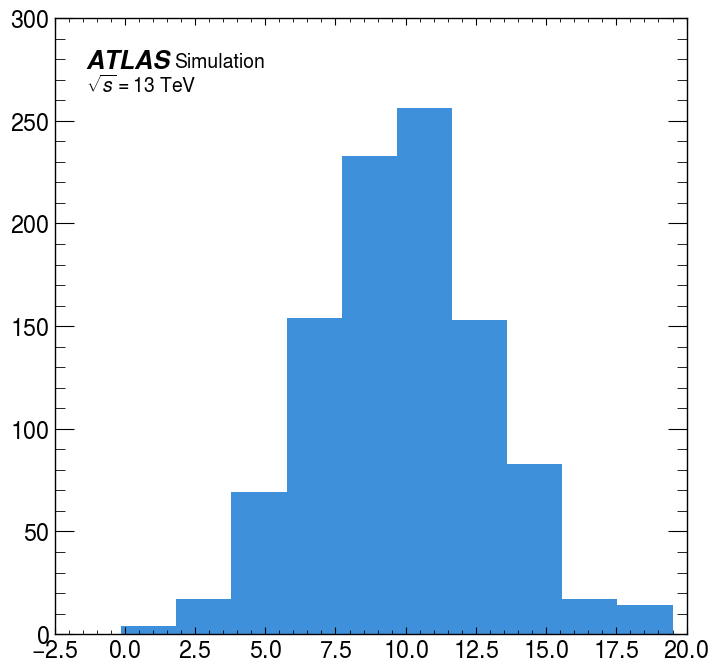

In [71]:
hep.style.use([hep.style.ATLAS, {'figure.figsize': (8, 8)}])
hep.histplot(np.histogram(np.random.normal(10, 3, 1000)), histtype='fill');
hep.atlas.label();

**Several options available when using the ATLAS label command:**

- loc (int, optional) – Label position of exp_text label: - 0 : Above axes, left aligned - 1 : Top left corner - 2 : Top left corner, multiline - 3 : Split EXP above axes, rest of label in top left corner” - 4 : (1) Top left corner, but align “rlabel” underneath

- ax (matplotlib.axes.Axes, optional) – Axes object (if None, last one is fetched)

- data (bool, optional) – Prevents prepending “Simulation” to experiment label. Default False.

- label (str, optional) – Text to append after "exp" (Simulation) "label". Typically “Preliminary” “Supplementary”, “Private Work” or “Work in Progress”

- year (int, optional) – Year when data was collected

- lumi (float, optional) – Aggregate luminosity shown. Should require "data" to be True.

- lumi_format (string, optional, default is “{0}”) – Format string for luminosity number, e.g. “{0:.1f}”

- com (float, optional, default is 13, but can be changed to 7/8/13.6/14 to fit different requirements)

- llabel (string, optional) – String to manually set left-hand label text. Will overwrite “data” and “label” kwargs.

- rlabel (string, optional) – String to manually set right-hand label text.

- fontname (string, optional) – Name of font to be used.

- fontsize (string, optional) – Defines size of “secondary label”. Experiment label is 1.3x larger.

- exp_weight (string, optional) – Set fontweight of "exp" label. Default “bold”.

- italic ((bool, bool, bool), optional) – Tuple of bools to switch which label is italicized

- pad (float, optional) – Additional padding from axes border in units of axes fraction size.

- exp (string) – Experiment name, unavailable in public "experiment"text().

# ATLAS Colors - automatically with `hep.style.ATLAS`

- Data should be always shown in black. Basic color recommendations with examples are found below.

- Categorical Data (e.g. 1D Stackplots): Use the color scheme suggested by M. Petroff in arXiv:2107.02270v2 and available on GitHub (MIT License). 
- Specifically you should use the 6-color scheme:
`["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"]`

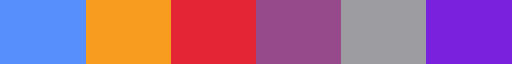

In [72]:
from matplotlib.colors import ListedColormap
petroff6 = ListedColormap(["#5790fc", "#f89c20", "#e42536", "#964a8b", "#9c9ca1", "#7a21dd"])
petroff6

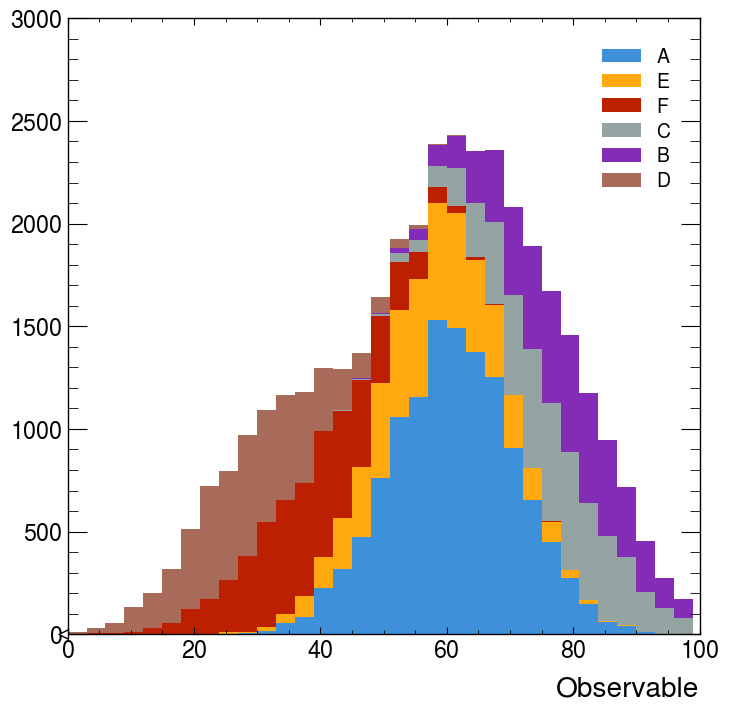

In [73]:
hn[{'tag': s[0.5j:len:sum], 'region': 0, 'syst': "X", 'x': s[::hist.tag.rebin(3)]}].plot(histtype='fill', stack=True);
plt.legend();

 - or if more colors are needed the 10-color scheme:
    ```
    ["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"]
    ```

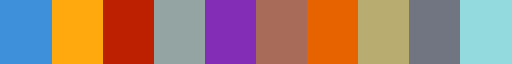

In [74]:
from matplotlib.colors import ListedColormap
petroff10 = ListedColormap(["#3f90da", "#ffa90e", "#bd1f01", "#94a4a2", "#832db6", "#a96b59", "#e76300", "#b9ac70", "#717581", "#92dadd"])
petroff10

# 2D plot

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f7ea050e710>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f7ea045ef80>, text=[])

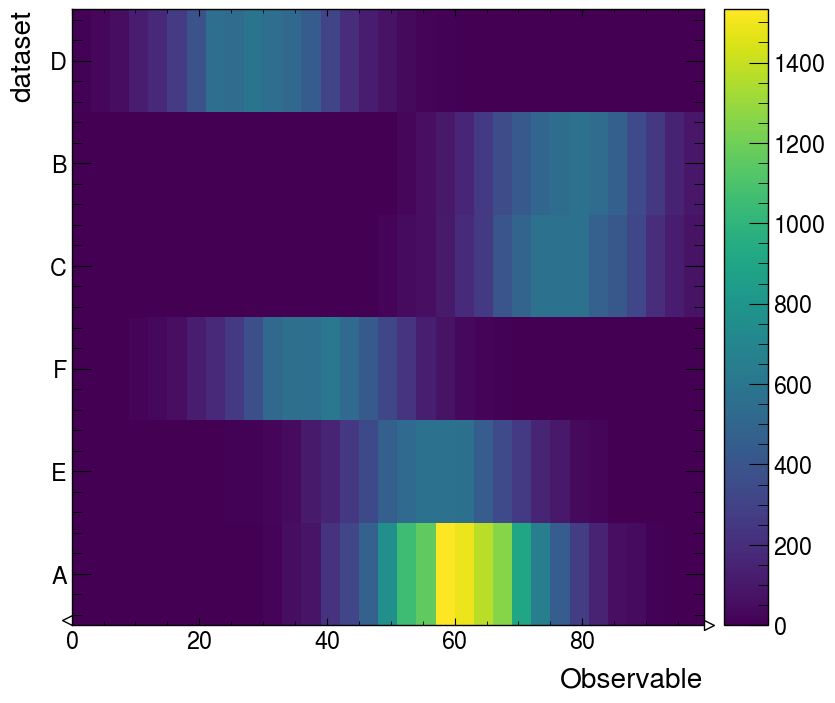

In [75]:
hn[{'tag': s[0.5j:len:sum], 'region': 0, 'syst': "X", 'x': s[::hist.tag.rebin(3)]}].plot2d()

**Hands-on exercise:**
- Open a PHYSLITE root file: you can use one from this morning tutorial or this one - root://eospublic.cern.ch//eos/opendata/atlas/rucio/mc20_13TeV/DAOD_PHYSLITE.37620646._000488.pool.root.1
- Check the structure and try to plot a distribution from a 1D plot!